# Coursework: EDA & Regression

## 1. Brief description of the data

The `MavenRail` dataset is a set of travel information that documents passenger train trips and whether or not the passengers have asked for refunds. Finding travelers who are most likely to ask for a refund of their train tickets may be done with the use of this dataset. 
This dataset consists of 13 columns and 31645 items. The 13 columns are summarized below.
1. Payment.Method: The way the ticket was paid for (such as "Contactless," "Credit Card").
2. Railcard: The type of railcard that is used to indicate eligibility for discounts (e.g., "Adult," "None").
3. Ticket.Class: The ticket's class (such as "Standard").
4. Ticket.Type: The kind of ticket that was bought (for example, "Advance").
5. Price: The price of the ticket is expressed in pounds (£).
6. Departure.Station: Stations for departure.
7. Arrival.Station: Stations for arrival.
8. Departure: Timestamps for departure times in DD/MM/YYYY HH:mm format.
9. Scheduled.Arrival: Timestamps for scheduled times in DD/MM/YYYY HH:mm format.
10. Actual.Arrival: Timestamps for arrival times in DD/MM/YYYY HH:mm format.
11. Journey.Status: The status of the journey, e.g., "On Time" or "Delayed."
12. Reason.for.Delay: Describes the reason for any delay, where applicable (e.g., "Signal Failure").
13. Refund.Request: Indicates if a refund was requested (e.g., "Yes" or "No").

Only the data type of `Price` is `int64`, and the rest of the 12 variables' data types are all `object`. The statistical description indicates that the mean value of `Price` is 23.435 and the standard deviation of `Price` is 29.99.
There are 20911 missing values in Railcard, 1880 missing values in `Actual.Arrival`, 3 missing values in `Departure`, 4 missing values in `Scheduled.Arrival`, and 27479 missing values in `Reason.for.Delay`.

In [788]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [789]:
mavenrail = pd.read_csv("MavenRail.csv")
mavenrail.head()

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request
0,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01 11:00,2024-01-01 13:30,2024-01-01 13:30,On Time,NaN,No
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45,2024-01-01 11:35,2024-01-01 11:40,Delayed,Signal Failure,No
2,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02 18:15,2024-01-02 18:45,2024-01-02 18:45,On Time,NaN,No
3,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01 21:30,2024-01-01 22:30,2024-01-01 22:30,On Time,NaN,No
4,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01 16:45,2024-01-01 19:00,2024-01-01 19:00,On Time,NaN,No


In [790]:
mavenrail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31645 entries, 0 to 31644
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Payment.Method     31645 non-null  object
 1   Railcard           10734 non-null  object
 2   Ticket.Class       31645 non-null  object
 3   Ticket.Type        31645 non-null  object
 4   Price              31645 non-null  int64 
 5   Departure.Station  31645 non-null  object
 6   Arrival.Station    31645 non-null  object
 7   Departure          31642 non-null  object
 8   Scheduled.Arrival  31641 non-null  object
 9   Actual.Arrival     29765 non-null  object
 10  Journey.Status     31645 non-null  object
 11  Reason.for.Delay   4166 non-null   object
 12  Refund.Request     31645 non-null  object
dtypes: int64(1), object(12)
memory usage: 3.1+ MB


In [791]:
mavenrail.describe()

,Price
count,31645.000000
mean,23.434634
std,29.990379
min,1.000000
25%,5.000000
50%,11.000000
75%,35.000000
max,267.000000


## Missing Data

In [792]:
mavenrail.isna().sum()

Payment.Method           0
Railcard             20911
Ticket.Class             0
Ticket.Type              0
Price                    0
Departure.Station        0
Arrival.Station          0
Departure                3
Scheduled.Arrival        4
Actual.Arrival        1880
Journey.Status           0
Reason.for.Delay     27479
Refund.Request           0
dtype: int64

In [793]:
mavenrail["Railcard"] = mavenrail["Railcard"].fillna("None")
# mavenrail["Railcard"].fillna("None", inplace = True) 

## EDA

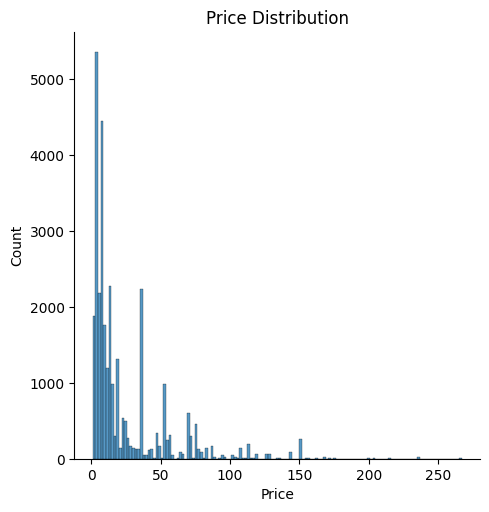

In [794]:
sns.displot(mavenrail["Price"]).set(title='Price Distribution')

The above figure indicates that most of the price located at 0 to 50.

[Text(0.5, 1.0, 'Railcard Distribution')]

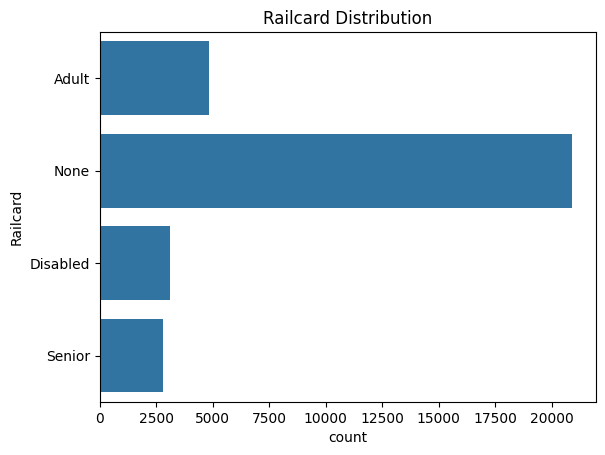

In [795]:
sns.countplot(mavenrail["Railcard"]).set(title='Railcard Distribution')

This plot indicates that most of the passengers do not hold a Railcard.

[Text(0.5, 1.0, 'Payment Method Distribution')]

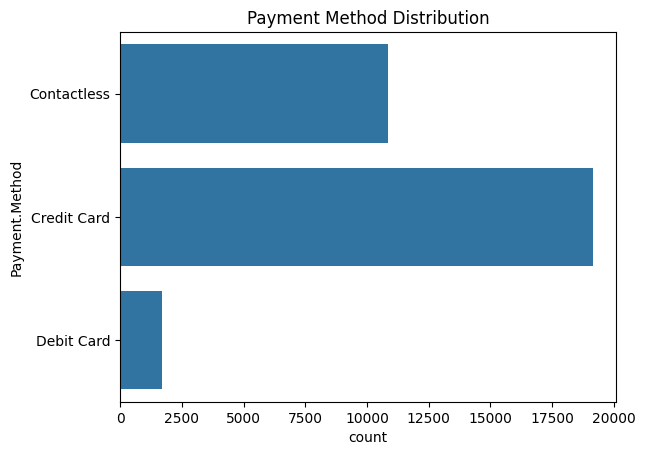

In [796]:
sns.countplot(mavenrail["Payment.Method"]).set(title='Payment Method Distribution')

[Text(0.5, 1.0, 'Payment Method by Refund Request')]

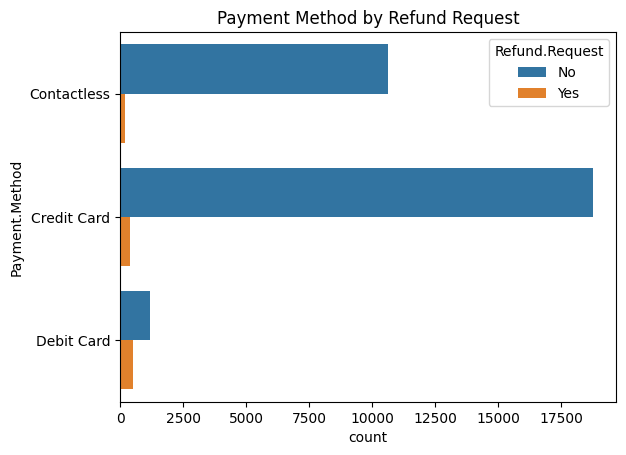

In [797]:
sns.countplot(data = mavenrail, y = "Payment.Method", hue = "Refund.Request").set(title='Payment Method by Refund Request')

This plot indicated that most of the passengers use Credit Card to pay.

In [798]:
pd.crosstab(mavenrail["Payment.Method"], mavenrail["Refund.Request"])

Refund.Request,No,Yes
Payment.Method,,
Contactless,10622,210
Credit Card,18731,402
Debit Card,1178,502


In [799]:
pd.crosstab(mavenrail["Payment.Method"], mavenrail["Railcard"])

Railcard,Adult,Disabled,None,Senior
Payment.Method,,,,
Contactless,1886,786,7429,731
Credit Card,2565,1974,13040,1554
Debit Card,394,329,442,515


[Text(0.5, 1.0, 'Ticket Class Distribution')]

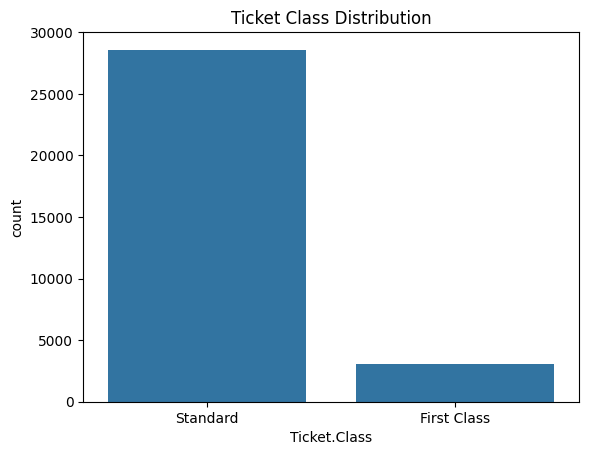

In [800]:
sns.countplot(data = mavenrail, x = 'Ticket.Class').set(title='Ticket Class Distribution')

[Text(0.5, 1.0, 'Ticket Class by Refund Request')]

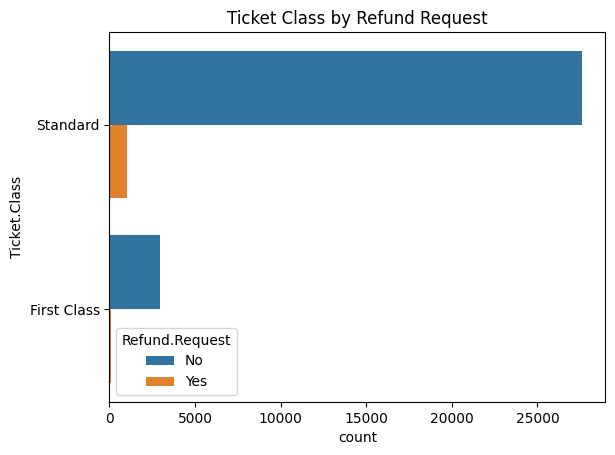

In [801]:
sns.countplot(data = mavenrail, y = "Ticket.Class", hue = "Refund.Request").set(title='Ticket Class by Refund Request')

[Text(0.5, 1.0, 'Tickey Type Distribution')]

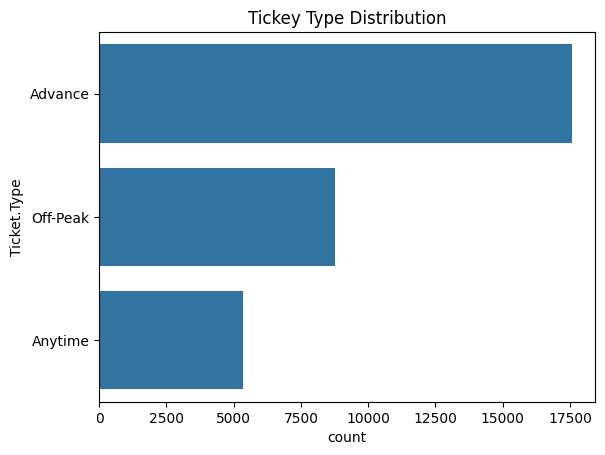

In [802]:
sns.countplot(mavenrail["Ticket.Type"]).set(title='Tickey Type Distribution')

[Text(0.5, 1.0, 'Ticket Type by Refund Request')]

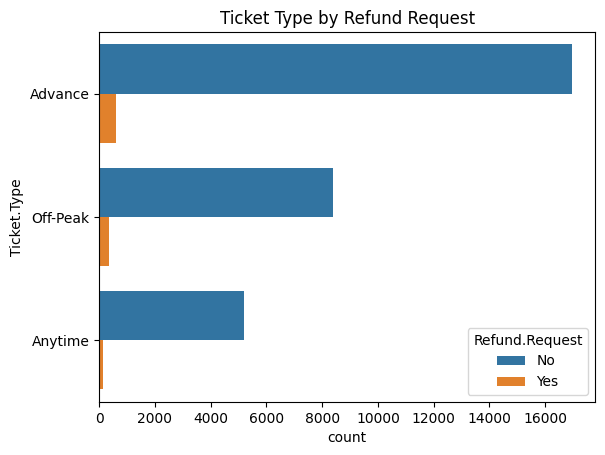

In [803]:
sns.countplot(data = mavenrail, y = "Ticket.Type", hue = "Refund.Request").set(title='Ticket Type by Refund Request')

In [804]:
pd.crosstab(mavenrail["Reason.for.Delay"], mavenrail["Refund.Request"])

Refund.Request,No,Yes
Reason.for.Delay,,
Signal Failure,753,215
Staff,320,79
Staffing,228,179
Technical Issue,319,387
Traffic,193,121
Weather,1239,133


[Text(0.5, 1.0, 'Reason for Delay by Refund Request')]

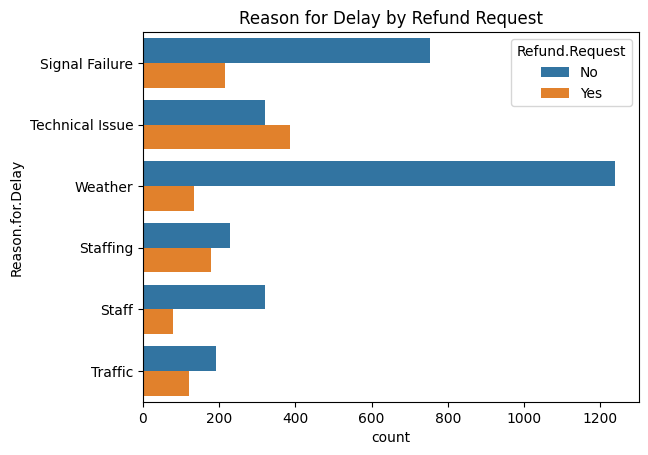

In [805]:
sns.countplot(data = mavenrail, y = "Reason.for.Delay", hue = "Refund.Request").set(title='Reason for Delay by Refund Request')

This table indicates that if the train didn't delay, passengers will not request refund. However, if there is some technical Issue for delay, passengers are likely to request refund.

In [806]:
mavenrail["Refund.Request"] = mavenrail["Refund.Request"].map({"Yes" : 1, "No": 0})
mavenrail["Ticket.Type"] = mavenrail["Ticket.Type"].map({"Advance": 0, "Off-Peak": 1, "Anytime": 2})
mavenrail["Payment.Method"] = mavenrail["Payment.Method"].map({"Contactless": 0, "Credit Card": 1, "Debit Card": 2})
mavenrail["Railcard"] = mavenrail["Railcard"].map({"None": 0, "Adult": 1, "Disabled": 2, "Senior": 3})
mavenrail["Reason.for.Delay"] = mavenrail["Reason.for.Delay"].map({np.nan: 0, "Signal Failure": 1, "Technical Issue": 2, "Weather": 3, "Staffing": 4, "Staff": 5, "Traffic": 6})
mavenrail["Ticket.Class"] = mavenrail["Ticket.Class"].map({"Standard": 0, "First Class": 1})
mavenrail["Journey.Status"] = mavenrail["Journey.Status"].map({"On Time": 0, "Delayed": 1, "Cancelled": 2})

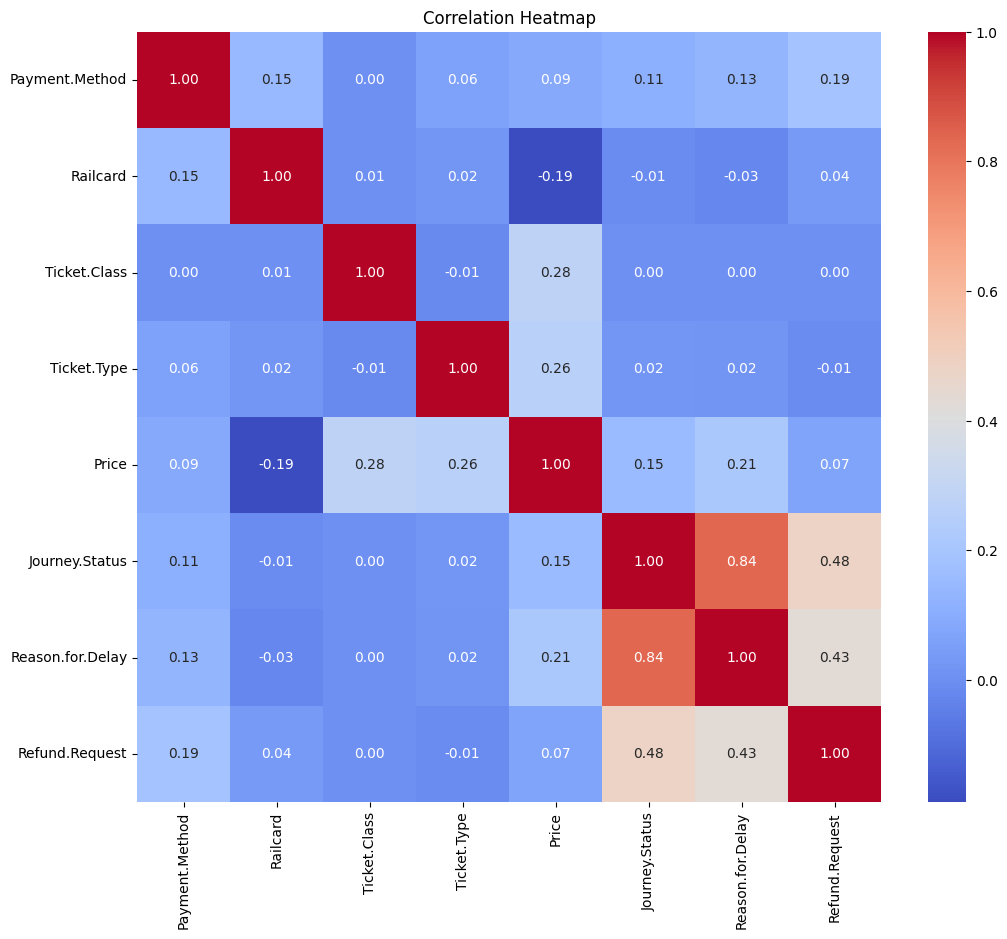

In [807]:
# Calculate correlation matrix
correlation_matrix = mavenrail.select_dtypes(include=['float64', 'int64']).corr()

# Create heatmap for correlation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 3. Add a column, DelayInMinutes, to the dataset that gives the duration of the delay in minutes, if the journey was delayed. If the train arrived on time, set DelayInMinutes to NA.
[2 marks]

In [808]:
mavenrail = pd.read_csv("MavenRail.csv")
mavenrail["Railcard"] = mavenrail["Railcard"].fillna("None")

mavenrail["Departure"] = pd.to_datetime( mavenrail["Departure"], format="%Y-%m-%d %H:%M")
mavenrail["Scheduled.Arrival"] = pd.to_datetime( mavenrail["Scheduled.Arrival"], format="%Y-%m-%d %H:%M")
mavenrail["Actual.Arrival"] = pd.to_datetime( mavenrail["Actual.Arrival"], format="%Y-%m-%d %H:%M")
mavenrail['DelayInMinutes'] = (mavenrail['Actual.Arrival'] - mavenrail['Scheduled.Arrival']).dt.total_seconds() / 60

# For journeys that were "On Time", set DelayInMinutes to NaN
mavenrail.loc[mavenrail['Journey.Status'] == 'On Time', 'DelayInMinutes'] = pd.NA

# Display the updated DataFrame
mavenrail.head()

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request,DelayInMinutes
0,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01 11:00:00,2024-01-01 13:30:00,2024-01-01 13:30:00,On Time,NaN,No,NaN
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,Delayed,Signal Failure,No,5.0
2,Credit Card,None,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02 18:15:00,2024-01-02 18:45:00,2024-01-02 18:45:00,On Time,NaN,No,NaN
3,Credit Card,None,Standard,Advance,13,London Paddington,Reading,2024-01-01 21:30:00,2024-01-01 22:30:00,2024-01-01 22:30:00,On Time,NaN,No,NaN
4,Contactless,None,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01 16:45:00,2024-01-01 19:00:00,2024-01-01 19:00:00,On Time,NaN,No,NaN


4. Restrict attention to those journeys where `Journey.Status` is not `On Time` and add a column, `MediumPrice`, to the resulting dataset that answers the question: Does the ticket price
lie in the range
`£10 < Price ≤ £30`.<br>
Fit an appropriate regression model that predicts whether a passenger will request a refund
using `MediumPrice` as a single predictor. With the help of the fitted model, answer the following questions (show your calculations, either by hand or with help of R or Python):
- What is the probability that a passenger will request a refund, given that they paid £5
for their ticket?
- What is the probability that a passenger will request a refund, given that their ticket
cost £25?

In [809]:
delayed = mavenrail[mavenrail["Journey.Status"] != "On Time"].copy()
delayed["MediumPrice"] = delayed["Price"].between(10, 30)
delayed["Refund.Request"] = delayed["Refund.Request"].map({"Yes" : 1, "No": 0})
delayed.dropna(subset=['Refund.Request', 'MediumPrice'], inplace=True)
delayed.head()

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request,DelayInMinutes,MediumPrice
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,Delayed,Signal Failure,0,5.0,True
8,Credit Card,None,Standard,Advance,37,London Euston,York,2024-01-01 00:00:00,2024-01-01 01:50:00,2024-01-01 02:07:00,Delayed,Signal Failure,0,17.0,False
20,Debit Card,Adult,Standard,Advance,7,Birmingham New Street,Manchester Piccadilly,2024-01-01 11:15:00,2024-01-01 12:35:00,2024-01-01 13:06:00,Delayed,Technical Issue,1,31.0,False
26,Credit Card,Senior,First Class,Advance,34,Oxford,Bristol Temple Meads,2024-01-01 14:15:00,2024-01-01 15:30:00,2024-01-01 15:54:00,Delayed,Signal Failure,1,24.0,False
39,Credit Card,None,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-02 02:15:00,2024-01-02 03:35:00,NaT,Cancelled,Technical Issue,0,NaN,False


In [ ]:
X = delayed[['MediumPrice']]
y = delayed["Refund.Request"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]

# Predict the classes for the test set
y_pred = model.predict(X_test)

# Calculate the AUC - ROC score
roc_auc = roc_auc_score(y_test, y_probs)

# Calculate other metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Predict probabilities for specific prices
prob_5 = model.predict_proba([[0]])[0][1]  # Ticket price £5 (MediumPrice = 0)
prob_25 = model.predict_proba([[1]])[0][1]  # Ticket price £25 (MediumPrice = 1)

# Output results
print(f"AUC - ROC Score: {roc_auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Probability of refund if ticket cost £5: {prob_5:.3f}")
print(f"Probability of refund if ticket cost £25: {prob_25:.3f}")

AUC - ROC Score: 0.53
Accuracy: 0.73
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Probability of refund if ticket cost £5: 0.254
Probability of refund if ticket cost £25: 0.306


c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


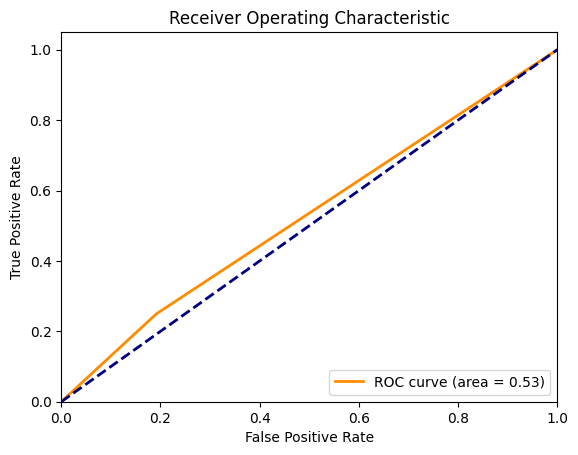

In [811]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

5. Using the data in `MavenRail.csv`, fit appropriate regression models and use them to determine how likely the passengers whose data appear in the file `ToPredict.csv` are to request a refund. You are free to choose which explanatory variables to include in your model
and may, if you like, compare several models, but make sure that you state clearly your final choice of model and give reasons supporting this choice. With the help of your chosen
model, interpret the results in terms of probability of requesting a refund (as you did for the
model based on MediumPrice). [6 marks]


In [812]:
mavenrail["Railcard"] = mavenrail["Railcard"].fillna("None")
mavenrail["Refund.Request"] = mavenrail["Refund.Request"].map({"Yes" : 1, "No": 0})
mavenrail["Ticket.Type"] = mavenrail["Ticket.Type"].map({"Advance": 0, "Off-Peak": 1, "Anytime": 2})
mavenrail["Payment.Method"] = mavenrail["Payment.Method"].map({"Contactless": 0, "Credit Card": 1, "Debit Card": 2})
mavenrail["Railcard"] = mavenrail["Railcard"].map({"None": 0, "Adult": 1, "Disabled": 2, "Senior": 3})
mavenrail["Reason.for.Delay"] = mavenrail["Reason.for.Delay"].map({np.nan: 0, "Signal Failure": 1, "Technical Issue": 2, "Weather": 3, "Staffing": 4, "Staff": 5, "Traffic": 6})
mavenrail["Ticket.Class"] = mavenrail["Ticket.Class"].map({"Standard": 0, "First Class": 1})
mavenrail["Journey.Status"] = mavenrail["Journey.Status"].map({"On Time": 0, "Delayed": 1, "Cancelled": 2})

#Calculate the Delay minutes
mavenrail['DelayInMinutes'] = (mavenrail['Actual.Arrival'] - mavenrail['Scheduled.Arrival']).dt.total_seconds() / 60

#Set Cancelled train's DelayInMinutes to 0
mavenrail.loc[mavenrail['Journey.Status'] == 2, 'DelayInMinutes'] = 0

In [813]:
mavenrail.head()

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request,DelayInMinutes
0,0,1,0,0,43,London Paddington,Liverpool Lime Street,2024-01-01 11:00:00,2024-01-01 13:30:00,2024-01-01 13:30:00,0,0,0,0.0
1,1,1,0,0,23,London Kings Cross,York,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,1,1,0,5.0
2,1,0,0,0,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02 18:15:00,2024-01-02 18:45:00,2024-01-02 18:45:00,0,0,0,0.0
3,1,0,0,0,13,London Paddington,Reading,2024-01-01 21:30:00,2024-01-01 22:30:00,2024-01-01 22:30:00,0,0,0,0.0
4,0,0,0,0,76,Liverpool Lime Street,London Euston,2024-01-01 16:45:00,2024-01-01 19:00:00,2024-01-01 19:00:00,0,0,0,0.0


In [814]:
to_predict = pd.read_csv("ToPredict.csv")
to_predict["Railcard"] = to_predict["Railcard"].fillna("None")
to_predict["Departure"] = pd.to_datetime( to_predict["Departure"], format="%Y-%m-%d %H:%M")
to_predict["Scheduled.Arrival"] = pd.to_datetime( to_predict["Scheduled.Arrival"], format="%Y-%m-%d %H:%M")
to_predict["Actual.Arrival"] = pd.to_datetime( to_predict["Actual.Arrival"], format="%Y-%m-%d %H:%M")
to_predict['DelayInMinutes'] = (to_predict['Actual.Arrival'] - to_predict['Scheduled.Arrival']).dt.total_seconds() / 60

to_predict["Ticket.Type"] = to_predict["Ticket.Type"].map({"Advance": 0, "Off-Peak": 1, "Anytime": 2})
to_predict["Payment.Method"] = to_predict["Payment.Method"].map({"Contactless": 0, "Credit Card": 1, "Debit Card": 2})
to_predict["Railcard"] = to_predict["Railcard"].map({"None": 0, "Adult": 1, "Disabled": 2, "Senior": 3})
to_predict["Ticket.Class"] = to_predict["Ticket.Class"].map({"Standard": 0, "First Class": 1})
to_predict["Reason.for.Delay"] = to_predict["Reason.for.Delay"].map({np.nan: 0, "Signal Failure": 1, "Technical Issue": 2, "Weather": 3, "Staffing": 4, "Staff": 5, "Traffic": 6})
to_predict["Journey.Status"] = to_predict["Journey.Status"].map({"On Time": 0, "Delayed": 1, "Cancelled": 2})

to_predict.loc[to_predict['Journey.Status'] == 2, 'DelayInMinutes'] = 0

to_predict

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,DelayInMinutes
0,2,0,1,0,54,London St Pancras,Birmingham New Street,2024-01-04 17:45:00,2024-01-04 19:05:00,2024-01-04 19:05:00,0,0,0.0
1,1,0,0,0,7,London Euston,Birmingham New Street,2024-01-05 08:15:00,2024-01-05 09:35:00,2024-01-05 09:35:00,0,0,0.0
2,2,0,0,1,113,Liverpool Lime Street,London Euston,2024-01-09 15:30:00,2024-01-09 17:45:00,2024-01-09 18:07:00,1,4,22.0
3,0,1,0,1,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-31 05:45:00,2024-01-31 06:15:00,2024-01-31 06:49:00,1,1,34.0
4,1,0,0,1,4,Manchester Piccadilly,Liverpool Lime Street,2024-02-10 16:00:00,2024-02-10 16:30:00,NaT,2,2,0.0
5,0,0,0,0,3,Manchester Piccadilly,Liverpool Lime Street,2024-02-25 15:45:00,2024-02-25 16:15:00,NaT,2,4,0.0
6,2,0,0,1,126,Manchester Piccadilly,London Euston,2024-03-20 15:30:00,2024-03-20 17:20:00,2024-03-20 17:36:00,1,4,16.0
7,1,0,0,0,22,Birmingham New Street,London St Pancras,2024-04-16 04:30:00,2024-04-16 05:50:00,NaT,2,1,0.0


### Logistic regression

In [815]:
mavenrail.dropna(subset=['Refund.Request', 'DelayInMinutes'], inplace=True)

X = mavenrail.drop(columns = ['Departure.Station','Arrival.Station','Departure','Scheduled.Arrival', 'Actual.Arrival'
                              , 'Refund.Request'], axis=1)
y = mavenrail['Refund.Request']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [816]:
X.isna().sum()

Payment.Method      0
Railcard            0
Ticket.Class        0
Ticket.Type         0
Price               0
Journey.Status      0
Reason.for.Delay    0
DelayInMinutes      0
dtype: int64

In [817]:
# Fit the logistic regression model
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

# Predict the probabilities for the test set
y_probs = lg_model.predict_proba(X_test)[:, 1]

# Predict the classes for the test set
y_pred = lg_model.predict(X_test)


# Calculate the AUC - ROC score
roc_auc = roc_auc_score(y_test, y_probs)

# Calculate other metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"AUC - ROC Score: {roc_auc:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

AUC - ROC Score: 0.968
Accuracy: 0.961
Precision: 0.354
Recall: 0.224
F1 Score: 0.275


c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


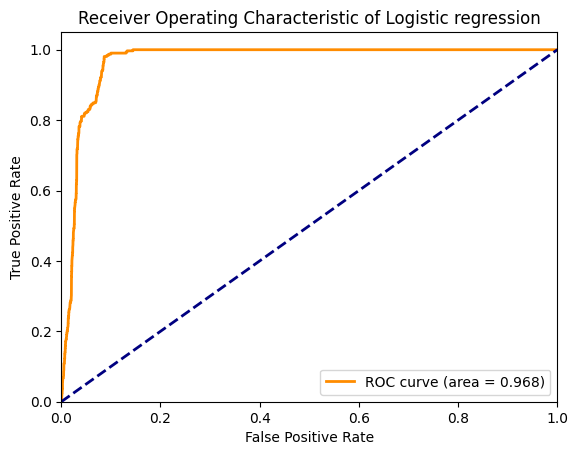

In [818]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Logistic regression')
plt.legend(loc="lower right")
plt.show()

In [819]:
# Predict probabilities for specific prices
prob_1 = lg_model.predict_proba([[2, 0, 1, 0, 54, 0, 0, 0.0]])[0][1]  # Passenger 1
prob_2 = lg_model.predict_proba([[1, 0, 0, 0, 7, 0, 0, 0.0]])[0][1]  # Passenger 1
prob_3 = lg_model.predict_proba([[2, 0, 0, 1, 113, 1, 4, 22.0]])[0][1]  # Passenger 1
prob_4 = lg_model.predict_proba([[0, 1, 0, 1, 3, 1, 1, 34.0]])[0][1]  # Passenger 1
prob_5 = lg_model.predict_proba([[1, 0, 0, 1, 4, 2, 2, 0.0]])[0][1]  # Passenger 1
prob_6 = lg_model.predict_proba([[0, 0, 0, 0, 3, 2, 4, 0.0]])[0][1]  # Passenger 1
prob_7 = lg_model.predict_proba([[2, 0, 0, 1, 126, 1, 4, 16.0]])[0][1]  # Passenger 1
prob_8 = lg_model.predict_proba([[1, 0, 0, 0, 22, 2, 1, 0.0]])[0][1]  # Passenger 1




print(f"Probability of refund if ticket cost the first passengaer: {prob_1:.3f}")
print(f"Probability of refund if ticket cost the second passengaer: {prob_2:.3f}")
print(f"Probability of refund if ticket cost the third passengaer: {prob_3:.3f}")
print(f"Probability of refund if ticket cost the forth passengaer: {prob_4:.3f}")
print(f"Probability of refund if ticket cost the fifth passengaer: {prob_5:.3f}")
print(f"Probability of refund if ticket cost the sixth passengaer: {prob_6:.3f}")
print(f"Probability of refund if ticket cost the seventh passengaer: {prob_7:.3f}")
print(f"Probability of refund if ticket cost the eighth passengaer: {prob_8:.3f}")

Probability of refund if ticket cost the first passengaer: 0.030
Probability of refund if ticket cost the second passengaer: 0.004
Probability of refund if ticket cost the third passengaer: 0.499
Probability of refund if ticket cost the forth passengaer: 0.005
Probability of refund if ticket cost the fifth passengaer: 0.354
Probability of refund if ticket cost the sixth passengaer: 0.110
Probability of refund if ticket cost the seventh passengaer: 0.504
Probability of refund if ticket cost the eighth passengaer: 0.381


c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, 

In [820]:
# Use the data in to_predic.csv to ptredict Refund.Result
X_pred = to_predict.drop(columns = ['Departure.Station','Arrival.Station','Departure','Scheduled.Arrival', 'Actual.Arrival'],
                     axis=1)
to_predict_prediction = lg_model.predict(X_pred)
print(to_predict_prediction)

[0 0 0 0 0 0 1 0]


### K-Nearest Neighbors

In [821]:
# Initialize the KNN classifier with chosen k value
k = 5  # You can experiment with different k values
knn_model = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn_model.fit(X_train, y_train)

# Predict the probabilities for the test set
y_probs = knn_model.predict_proba(X_test)[:, 1]

# Predict the classes for the test set
y_pred = knn_model.predict(X_test)


# Calculate the AUC - ROC score
roc_auc = roc_auc_score(y_test, y_probs)

# Calculate other metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"AUC - ROC Score: {roc_auc:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

AUC - ROC Score: 0.904
Accuracy: 0.971
Precision: 0.570
Recall: 0.433
F1 Score: 0.492


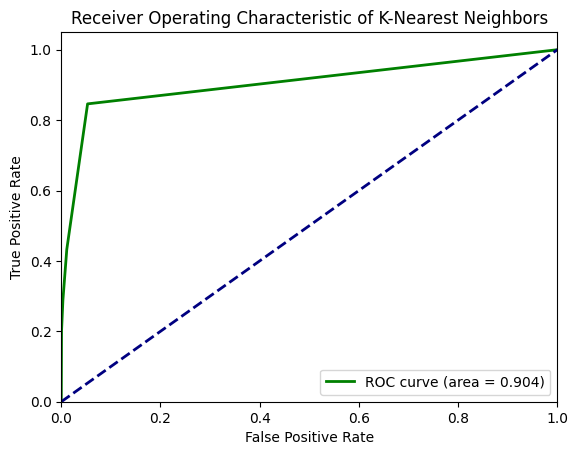

In [822]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of K-Nearest Neighbors')
plt.legend(loc="lower right")
plt.show()

In [823]:
# Predict probabilities for specific prices
prob_1 = knn_model.predict_proba([[2, 0, 1, 0, 54, 0, 0, 0.0]])[0][1]  # Passenger 1
prob_2 = knn_model.predict_proba([[1, 0, 0, 0, 7, 0, 0, 0.0]])[0][1]  # Passenger 2
prob_3 = knn_model.predict_proba([[2, 0, 0, 1, 113, 1, 4, 22.0]])[0][1]  # Passenger 3
prob_4 = knn_model.predict_proba([[0, 1, 0, 1, 3, 1, 1, 34.0]])[0][1]  # Passenger 4
prob_5 = knn_model.predict_proba([[1, 0, 0, 1, 4, 2, 2, 0.0]])[0][1]  # Passenger 5
prob_6 = knn_model.predict_proba([[0, 0, 0, 0, 3, 2, 4, 0.0]])[0][1]  # Passenger 6
prob_7 = knn_model.predict_proba([[2, 0, 0, 1, 126, 1, 4, 16.0]])[0][1]  # Passenger 7
prob_8 = knn_model.predict_proba([[1, 0, 0, 0, 22, 2, 1, 0.0]])[0][1]  # Passenger 8




print(f"Probability of refund if ticket cost the first passengaer: {prob_1:.3f}")
print(f"Probability of refund if ticket cost the second passengaer: {prob_2:.3f}")
print(f"Probability of refund if ticket cost the third passengaer: {prob_3:.3f}")
print(f"Probability of refund if ticket cost the forth passengaer: {prob_4:.3f}")
print(f"Probability of refund if ticket cost the fifth passengaer: {prob_5:.3f}")
print(f"Probability of refund if ticket cost the sixth passengaer: {prob_6:.3f}")
print(f"Probability of refund if ticket cost the seventh passengaer: {prob_7:.3f}")
print(f"Probability of refund if ticket cost the eighth passengaer: {prob_8:.3f}")

Probability of refund if ticket cost the first passengaer: 0.000
Probability of refund if ticket cost the second passengaer: 0.000
Probability of refund if ticket cost the third passengaer: 1.000
Probability of refund if ticket cost the forth passengaer: 0.400
Probability of refund if ticket cost the fifth passengaer: 0.200
Probability of refund if ticket cost the sixth passengaer: 0.000
Probability of refund if ticket cost the seventh passengaer: 0.200
Probability of refund if ticket cost the eighth passengaer: 0.000


c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature

In [824]:
# Use the data in to_predic.csv to ptredict Refund.Result
X_pred = to_predict.drop(columns = ['Departure.Station','Arrival.Station','Departure','Scheduled.Arrival', 'Actual.Arrival'],
                    axis=1)
to_predict_prediction = knn_model.predict(X_pred)
print(to_predict_prediction)

[0 0 1 0 0 0 0 0]


### Random Forest Classifier

In [825]:
# Initialize the Randon Forest Classifier

rfc_model = RandomForestClassifier()

# Train the model
rfc_model.fit(X_train, y_train)

# Predict the probabilities for the test set
y_probs = rfc_model.predict_proba(X_test)[:, 1]

# Predict the classes for the test set
y_pred = rfc_model.predict(X_test)


# Calculate the AUC - ROC score
roc_auc = roc_auc_score(y_test, y_probs)

# Calculate other metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"AUC - ROC Score: {roc_auc:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

AUC - ROC Score: 0.974
Accuracy: 0.976
Precision: 0.662
Recall: 0.564
F1 Score: 0.609


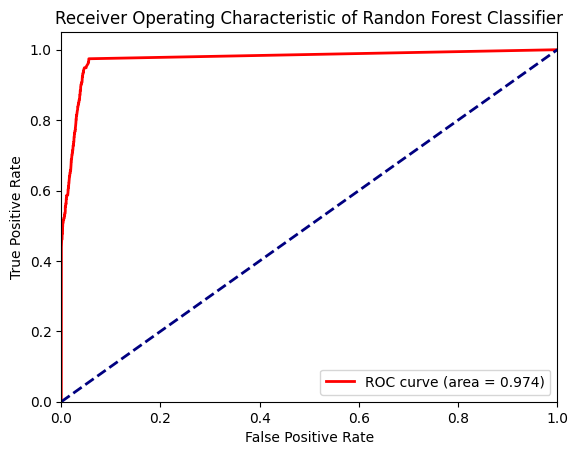

In [826]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Randon Forest Classifier')
plt.legend(loc="lower right")
plt.show()

In [827]:
# Predict probabilities for specific prices
prob_1 =rfc_model.predict_proba([[2, 0, 1, 0, 54, 0, 0, 0.0]])[0][1]  # Passenger 1
prob_2 = rfc_model.predict_proba([[1, 0, 0, 0, 7, 0, 0, 0.0]])[0][1]  # Passenger 2
prob_3 = rfc_model.predict_proba([[2, 0, 0, 1, 113, 1, 4, 22.0]])[0][1]  # Passenger 3
prob_4 = rfc_model.predict_proba([[0, 1, 0, 1, 3, 1, 1, 34.0]])[0][1]  # Passenger 4
prob_5 = rfc_model.predict_proba([[1, 0, 0, 1, 4, 2, 2, 0.0]])[0][1]  # Passenger 5
prob_6 = rfc_model.predict_proba([[0, 0, 0, 0, 3, 2, 4, 0.0]])[0][1]  # Passenger 6
prob_7 = rfc_model.predict_proba([[2, 0, 0, 1, 126, 1, 4, 16.0]])[0][1]  # Passenger 7
prob_8 = rfc_model.predict_proba([[1, 0, 0, 0, 22, 2, 1, 0.0]])[0][1]  # Passenger 8




print(f"Probability of refund if ticket cost the first passengaer: {prob_1:.3f}")
print(f"Probability of refund if ticket cost the second passengaer: {prob_2:.3f}")
print(f"Probability of refund if ticket cost the third passengaer: {prob_3:.3f}")
print(f"Probability of refund if ticket cost the forth passengaer: {prob_4:.3f}")
print(f"Probability of refund if ticket cost the fifth passengaer: {prob_5:.3f}")
print(f"Probability of refund if ticket cost the sixth passengaer: {prob_6:.3f}")
print(f"Probability of refund if ticket cost the seventh passengaer: {prob_7:.3f}")
print(f"Probability of refund if ticket cost the eighth passengaer: {prob_8:.3f}")

Probability of refund if ticket cost the first passengaer: 0.000
Probability of refund if ticket cost the second passengaer: 0.000
Probability of refund if ticket cost the third passengaer: 1.000
Probability of refund if ticket cost the forth passengaer: 0.071
Probability of refund if ticket cost the fifth passengaer: 0.128
Probability of refund if ticket cost the sixth passengaer: 0.020
Probability of refund if ticket cost the seventh passengaer: 0.990
Probability of refund if ticket cost the eighth passengaer: 0.022


c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid

In [828]:
# Use the data in to_predic.csv to ptredict Refund.Result
X_pred = to_predict.drop(columns = ['Departure.Station','Arrival.Station','Departure','Scheduled.Arrival', 'Actual.Arrival'],
                    axis=1)
to_predict_prediction = rfc_model.predict(X_pred)
print(to_predict_prediction)

[0 0 1 0 0 0 1 0]


### Support Vector Classification

In [829]:
# Initialize the SVC
svc_model = SVC(probability=True)

# Train the model
svc_model.fit(X_train, y_train)

# Predict the probabilities for the test set
y_probs = svc_model.predict_proba(X_test)[:, 1]

# Predict the classes for the test set
y_pred = svc_model.predict(X_test)


# Calculate the AUC - ROC score
roc_auc = roc_auc_score(y_test, y_probs)

# Calculate other metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"AUC - ROC Score: {roc_auc:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

AUC - ROC Score: 0.891
Accuracy: 0.970
Precision: 0.745
Recall: 0.122
F1 Score: 0.209


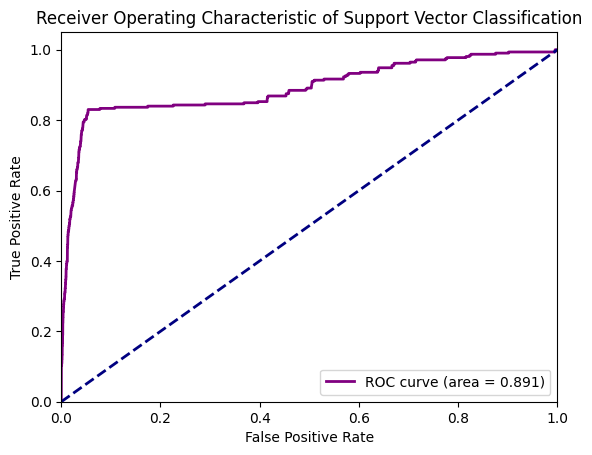

In [830]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Support Vector Classification')
plt.legend(loc="lower right")
plt.show()

In [831]:
# Predict probabilities for specific prices
prob_1 = svc_model.predict_proba([[2, 0, 1, 0, 54, 0, 0, 0.0]])[0][1]  # Passenger 1
prob_2 = svc_model.predict_proba([[1, 0, 0, 0, 7, 0, 0, 0.0]])[0][1]  # Passenger 2
prob_3 = svc_model.predict_proba([[2, 0, 0, 1, 113, 1, 4, 22.0]])[0][1]  # Passenger 3
prob_4 = svc_model.predict_proba([[0, 1, 0, 1, 3, 1, 1, 34.0]])[0][1]  # Passenger 4
prob_5 = svc_model.predict_proba([[1, 0, 0, 1, 4, 2, 2, 0.0]])[0][1]  # Passenger 5
prob_6 = svc_model.predict_proba([[0, 0, 0, 0, 3, 2, 4, 0.0]])[0][1]  # Passenger 6
prob_7 = svc_model.predict_proba([[2, 0, 0, 1, 126, 1, 4, 16.0]])[0][1]  # Passenger 7
prob_8 = svc_model.predict_proba([[1, 0, 0, 0, 22, 2, 1, 0.0]])[0][1]  # Passenger 8




print(f"Probability of refund if ticket cost the first passengaer: {prob_1:.3f}")
print(f"Probability of refund if ticket cost the second passengaer: {prob_2:.3f}")
print(f"Probability of refund if ticket cost the third passengaer: {prob_3:.3f}")
print(f"Probability of refund if ticket cost the forth passengaer: {prob_4:.3f}")
print(f"Probability of refund if ticket cost the fifth passengaer: {prob_5:.3f}")
print(f"Probability of refund if ticket cost the sixth passengaer: {prob_6:.3f}")
print(f"Probability of refund if ticket cost the seventh passengaer: {prob_7:.3f}")
print(f"Probability of refund if ticket cost the eighth passengaer: {prob_8:.3f}")

Probability of refund if ticket cost the first passengaer: 0.028
Probability of refund if ticket cost the second passengaer: 0.033
Probability of refund if ticket cost the third passengaer: 0.206
Probability of refund if ticket cost the forth passengaer: 0.027
Probability of refund if ticket cost the fifth passengaer: 0.034
Probability of refund if ticket cost the sixth passengaer: 0.034
Probability of refund if ticket cost the seventh passengaer: 0.055
Probability of refund if ticket cost the eighth passengaer: 0.031


c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\melod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Us

In [832]:
# Use the data in to_predic.csv to ptredict Refund.Result
X_pred = to_predict.drop(columns = ['Departure.Station','Arrival.Station','Departure','Scheduled.Arrival', 'Actual.Arrival'],
                    axis=1)
to_predict_prediction = svc_model.predict(X_pred)
print(to_predict_prediction)

[0 0 0 0 0 0 0 0]


The AUC-ROC of Random Forest is highest, so I chose this model to be my final model. So the prediction of whether the passenger will request refund is `[0 0 1 0 0 0 1 0]`.

### References
- https://www.kaggle.com/code/trnthminhtm/big-data-analytics-final-project/notebook
- https://www.datacamp.com/tutorial/understanding-logistic-regression-python
- https://www.datacamp.com/tutorial/auc?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720821&utm_adgroupid=157098104775&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=684592139990&utm_targetid=aud-1700705940199:dsa-2264919291789&utm_loc_interest_ms=&utm_loc_physical_ms=1006912&utm_content=&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-row-p1_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na-fawnov24&gad_source=1&gclid=Cj0KCQiA0MG5BhD1ARIsAEcZtwQwG_i9rPOImdC4-dWjNuU-yFZOOWxIU4CmJH5V4nwD1B30-xsu8ZwaAmeGEALw_wcB
